In [52]:
!pip install -U scipy
!pip install -U seaborn


     -------------------------------------- 889.2/889.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 137.8/137.8 kB ? eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 5.0 MB/s eta 0:00:00
     -------------------------------------- 384.3/384.3 kB 4.7 MB/s eta 0:00:00
  Created wheel for qgrid: filename=qgrid-1.3.1-py2.py3-none-any.whl size=1761266 sha256=3dc313871a0956fbefe16e1c82117eb77b70d0f7dfe470455407265adb18587d
  Stored in directory: c:\users\artif\appdata\local\pip\cache\wheels\4a\65\d3\ec3d01337551a41a66aa7fe06c4d775b4a6a8ca798244a7e84
Successfully built qgrid


In [ ]:

!pip install ipydatagrid

In [59]:
from transformers import AutoTokenizer, AutoModel
import torch

# model_name = 'inkoziev/sbert_pq'
model_name = 'sentence-transformers/distiluse-base-multilingual-cased-v1'
# model_name = 'symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli'
# model_name = 'sberbank-ai/ruRoberta-large'

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

def get_sentence_embeddings(sentences):
    # Tokenize sentences
    encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)

    # Perform pooling. In this case, mean pooling.
    return mean_pooling(model_output, encoded_input['attention_mask'])
    



In [60]:
%%time
# Sentences we want sentence embeddings for
sentences = ['беременность',
    'Что положено женщинам при беременности?',
    'Продолжительность рабочего дня для колясочников',
    'Продолжительность рабочего времени лиц до восемнадцати лет, получающих образование',
      'Продолжительность рабочего дня для инвалида', 
            'Что такое ненормированный рабочий день?',
            'Ненормированный рабочий день - особый режим работы, в соответствии с которым отдельные работники могут по распоряжению работодателя при необходимости эпизодически привлекаться к выполнению своих трудовых функций за пределами установленной для них продолжительности рабочего времени. Перечень должностей работников с ненормированным рабочим днем устанавливается коллективным договором, соглашениями или локальным нормативным актом, принимаемым с учетом мнения представительного органа работников.',
    'Выплата такой компенсации, а также возмещение иных расходов, связанных с выполнением работ на дому, производятся работодателем в порядке, определенном трудовым договором.',        
  
             'Распорядок дня для инвалида и продолжительность жизни',
             
             'На период отпуска по уходу за ребенком за работником сохраняется место работы (должность).',
             
             'Сокращенная продолжительность рабочего времени устанавливается для работников, являющихся инвалидами I или II группы, - не более 35 часов в неделю.', 
             'Продолжительность рабочего времени конкретного работника устанавливается трудовым договором на основании отраслевого (межотраслевого) соглашения и коллективного договора с учетом результатов специальной оценки условий труда.',
             'Сверхурочная работа оплачивается за первые два часа работы не менее чем в полуторном размере, за последующие часы - не менее чем в двойном размере. ',
             'Женщинам по их заявлению и на основании выданного в установленном порядке листка нетрудоспособности предоставляются отпуска по беременности и родам продолжительностью 70 календарных дней до родов и 70 календарных дней после родов с выплатой пособия по государственному социальному страхованию.',
             'Отпуск по беременности и родам исчисляется суммарно и предоставляется женщине полностью независимо от числа дней, фактически использованных ею до родов.',
             'Продолжительность работы в ночное время уравнивается с продолжительностью работы в дневное время в тех случаях, когда это необходимо по условиям труда, а также на сменных работах при шестидневной рабочей неделе с одним выходным днем.',
             'Общая продолжительность рабочего времени медицинского работника медицинской организации с учетом времени дежурства на дому не должна превышать норму рабочего времени медицинского работника медицинской организации за соответствующий период.',
             'Продолжительность рабочего времени лиц в возрасте до восемнадцати лет, получающих общее образование или среднее профессиональное образование и совмещающих в течение учебного года получение образования с работой, не может превышать половины норм, установленных частью первой настоящей статьи для лиц соответствующего возраста.',
            ]


print("Sentence embeddings:")

print(sentence_embeddings:=get_sentence_embeddings(sentences))

Sentence embeddings:
tensor([[ 0.0155,  0.0044,  0.0086,  ..., -0.0167,  0.0473,  0.1201],
        [-0.0110,  0.0784, -0.0379,  ...,  0.0460,  0.0275,  0.0112],
        [-0.0402,  0.0269,  0.0608,  ..., -0.0038,  0.0057,  0.0530],
        ...,
        [ 0.0095,  0.0889, -0.0454,  ...,  0.0003, -0.0082, -0.0425],
        [-0.0538,  0.0065,  0.0789,  ..., -0.0230,  0.0025, -0.0407],
        [-0.0234,  0.0601,  0.1031,  ..., -0.0664,  0.0107, -0.1335]])
CPU times: total: 4 s
Wall time: 1.99 s


In [61]:

from scipy import spatial
from scipy.spatial.distance import pdist, squareform

result = spatial.distance.cosine(sentence_embeddings[0], sentence_embeddings[1])
print(result)

r = squareform(pdist(sentence_embeddings, 'cosine'))
print(r)

0.32618534564971924
[[0.         0.32618537 0.82895337 0.88563232 0.77576259 0.94393406
  1.02117023 0.97399281 0.7961783  0.84927042 0.96712228 0.97695048
  1.04655619 0.72639342 0.62740407 1.05232957 0.99176655 1.03374432]
 [0.32618537 0.         0.91315468 0.9721206  0.90236274 0.77034951
  0.96590202 0.95844673 0.88572711 0.82046224 0.98983291 1.00383623
  1.03796622 0.61485807 0.53277583 1.03231819 0.96458769 1.00235588]
 [0.82895337 0.91315468 0.         0.5652238  0.20439305 0.5930905
  0.56934227 0.86907296 0.33943071 0.65221709 0.64182841 0.67268399
  0.71374195 0.79115301 0.76745999 0.58204714 0.64262579 0.82361767]
 [0.88563232 0.9721206  0.5652238  0.         0.51181769 0.81304222
  0.72102409 0.80309329 0.64019383 0.69143546 0.73134583 0.65263072
  0.76551611 0.88177999 0.9051924  0.69800091 0.68935158 0.37339348]
 [0.77576259 0.90236274 0.20439305 0.51181769 0.         0.50430415
  0.54604432 0.81494803 0.15793352 0.60582445 0.50509837 0.68667271
  0.75338964 0.70655823 0

In [62]:
sentence_embeddings.shape

torch.Size([18, 768])

In [63]:
trimmed_sents = [s[:50] for s in sentences]
print(trimmed_sents)

['беременность', 'Что положено женщинам при беременности?', 'Продолжительность рабочего дня для колясочников', 'Продолжительность рабочего времени лиц до восемнад', 'Продолжительность рабочего дня для инвалида', 'Что такое ненормированный рабочий день?', 'Ненормированный рабочий день - особый режим работы', 'Выплата такой компенсации, а также возмещение иных', 'Распорядок дня для инвалида и продолжительность жи', 'На период отпуска по уходу за ребенком за работник', 'Сокращенная продолжительность рабочего времени уст', 'Продолжительность рабочего времени конкретного раб', 'Сверхурочная работа оплачивается за первые два час', 'Женщинам по их заявлению и на основании выданного ', 'Отпуск по беременности и родам исчисляется суммарн', 'Продолжительность работы в ночное время уравнивает', 'Общая продолжительность рабочего времени медицинск', 'Продолжительность рабочего времени лиц в возрасте ']


In [64]:
import seaborn as sns
import pandas as pd
from ipydatagrid import DataGrid, TextRenderer
from bqplot import LinearScale, ColorScale, OrdinalColorScale, OrdinalScale

pairwise_df = pd.DataFrame(
    r,
    columns = sentences,
    index = sentences
)


# pairwise_df

def_renderer=TextRenderer(background_color=ColorScale(min=0., max=1., scheme="viridis"))
datagrid = DataGrid(
    pairwise_df, base_row_size=32, base_column_size=150,  default_renderer=def_renderer,
)
datagrid

DataGrid(auto_fit_params={'area': 'all', 'padding': 30, 'numCols': None}, base_column_size=150, base_row_size=…

[Text(0.5, 0, 'Продолжительность рабочего времени лиц до восемнадцати лет, получающих образование'),
 Text(1.5, 0, 'Продолжительность рабочего дня для инвалида'),
 Text(2.5, 0, 'Что такое ненормированный рабочий день?'),
 Text(3.5, 0, 'Ненормированный рабочий день - особый режим работы, в соответствии с которым отдельные работники могут по распоряжению работодателя при необходимости эпизодически привлекаться к выполнению своих трудовых функций за пределами установленной для них продолжительности рабочего времени. Перечень должностей работников с ненормированным рабочим днем устанавливается коллективным договором, соглашениями или локальным нормативным актом, принимаемым с учетом мнения представительного органа работников.'),
 Text(4.5, 0, 'Выплата такой компенсации, а также возмещение иных расходов, связанных с выполнением работ на дому, производятся работодателем в порядке, определенном трудовым договором.'),
 Text(5.5, 0, 'Распорядок дня для инвалида и продолжительность жизни'),
 Tex

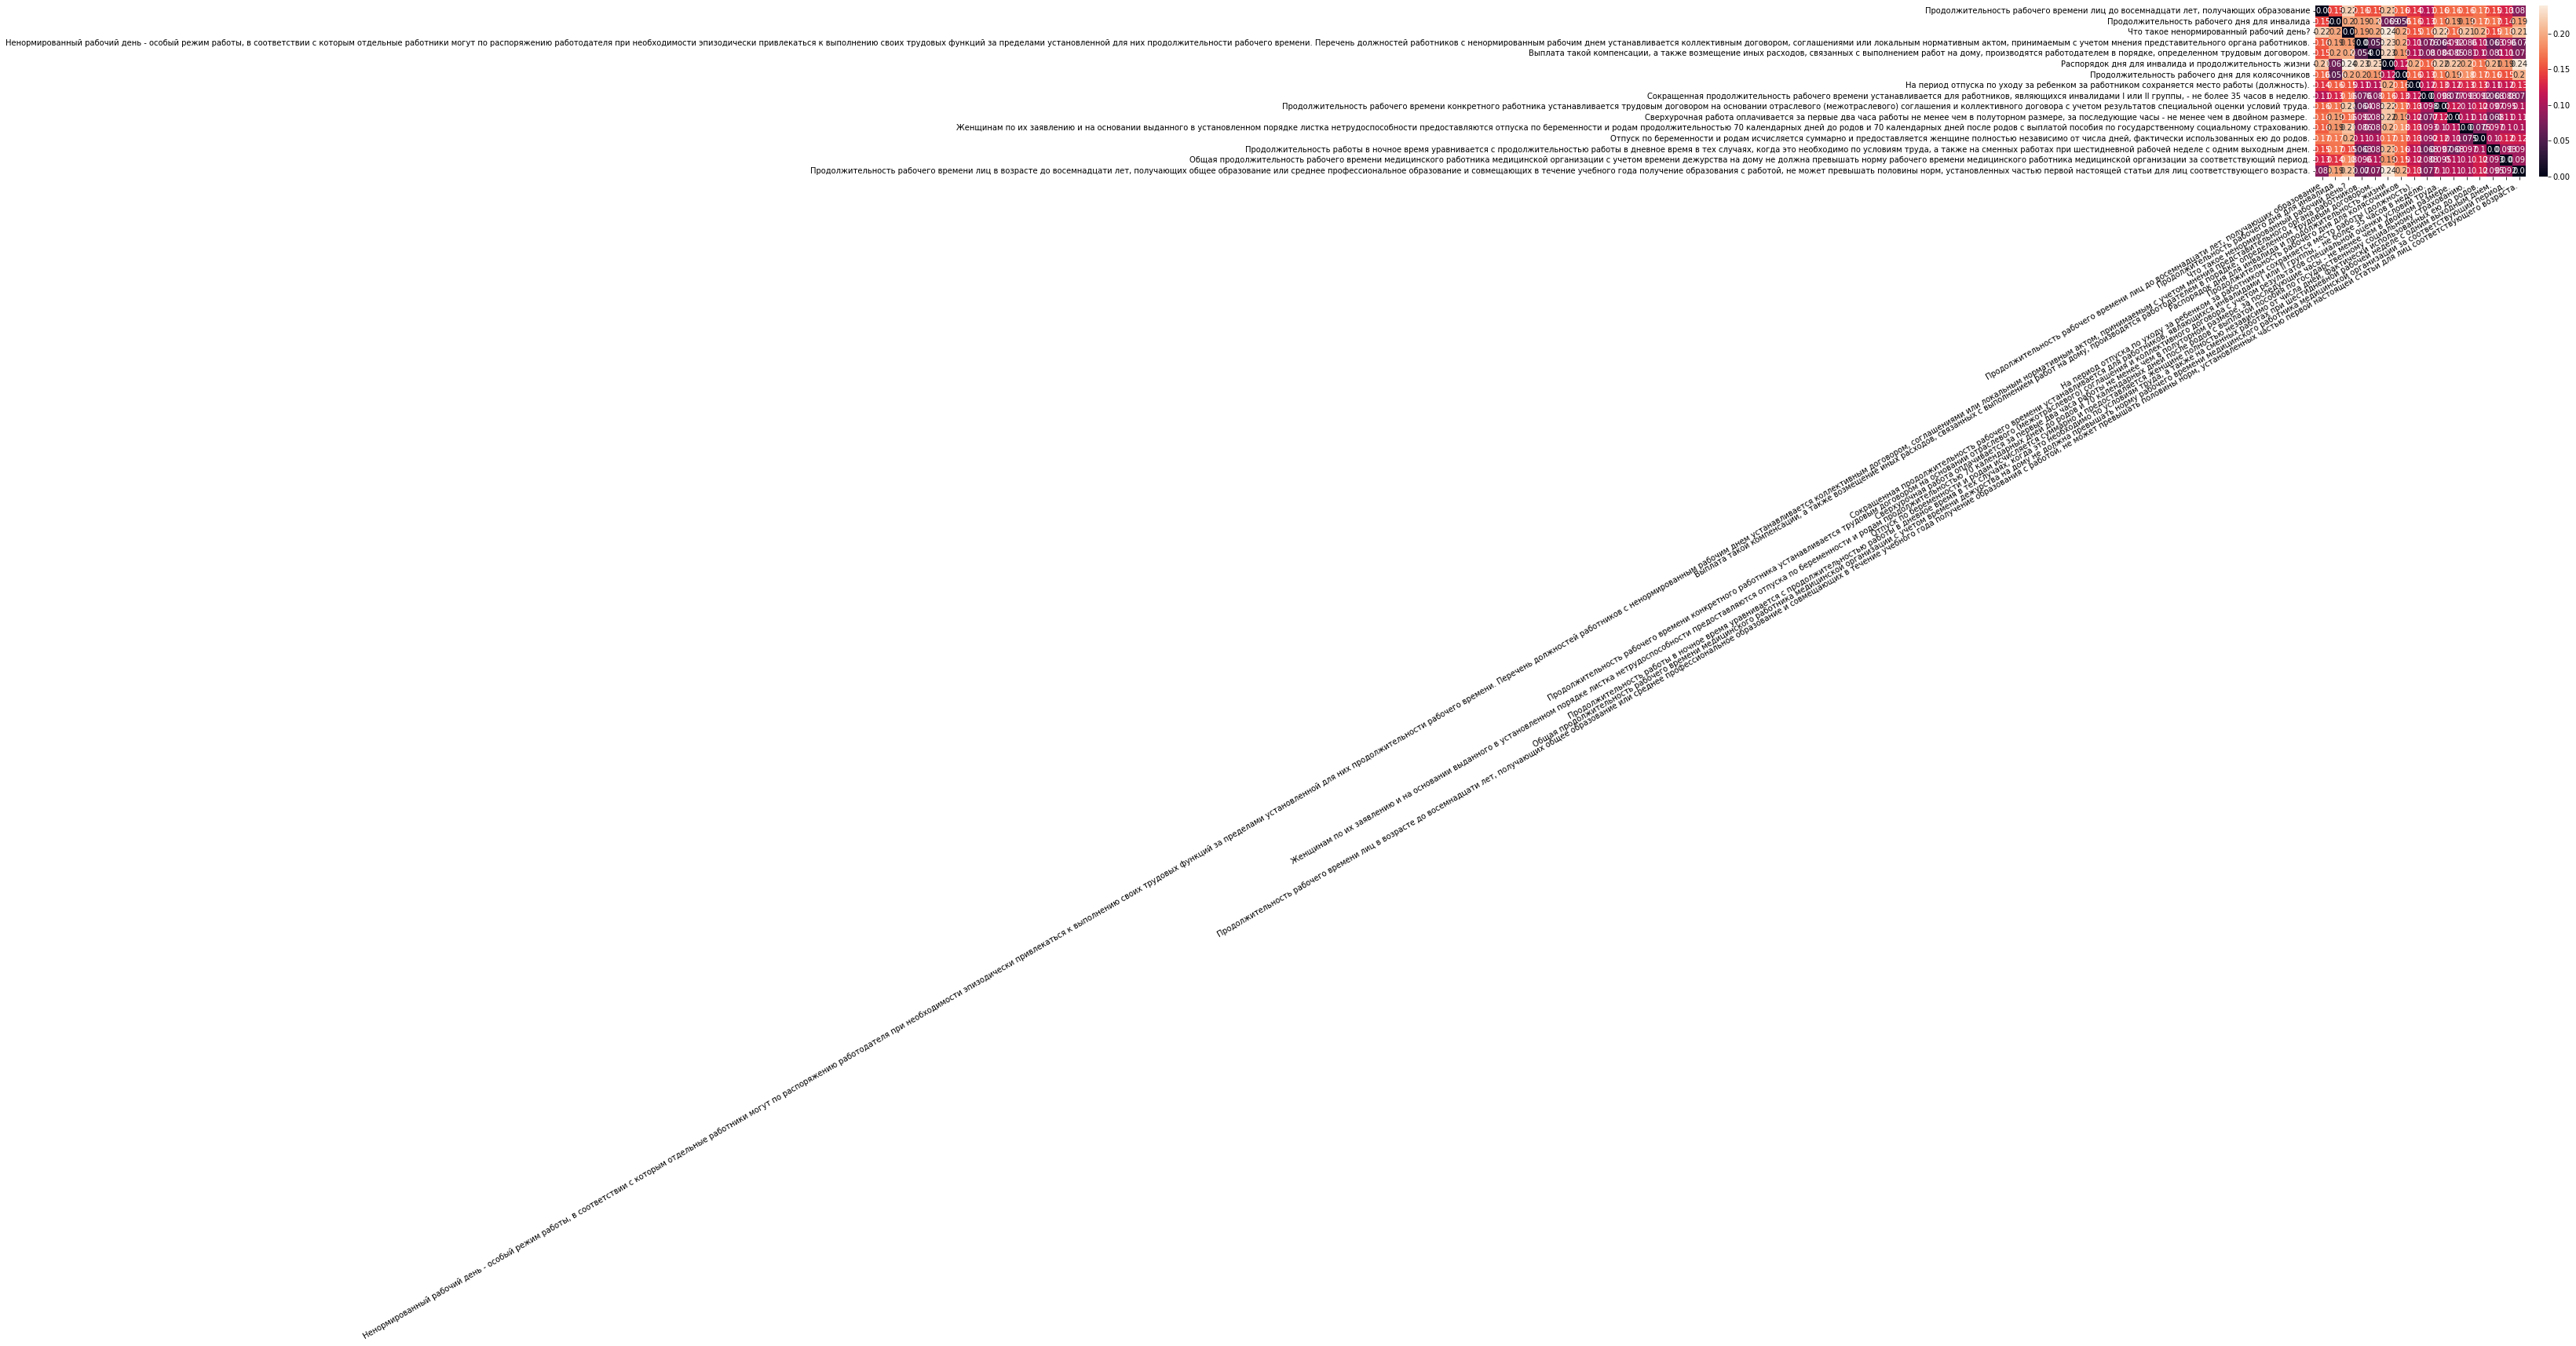

In [36]:
hmap = sns.heatmap(pairwise_df, annot=True, fmt=".2")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
# plt.ylabel('Sentences')
# plt.xlabel('Sentences');